In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données

circonscriptions_2014 = pd.read_csv("data/2014/circonscriptions.csv", encoding="ISO-8859-1", sep=";")
circonscriptions_2018 = pd.read_csv("data/2018/circonscriptions.csv", encoding="ISO-8859-1", sep=";")
circonscriptions_2022 = pd.read_csv("data/2022/circonscriptions.csv", encoding="ISO-8859-1", sep=";")
votes_candidats_2014 = pd.read_csv("data/2014/candidats.csv", encoding="ISO-8859-1", sep=";")
votes_candidats_2018 = pd.read_csv("data/2018/candidats.csv", encoding="ISO-8859-1", sep=";")
votes_candidats_2022 = pd.read_csv("data/2022/candidats.csv", encoding="ISO-8859-1", sep=";")

In [3]:
# Deux colonnes ne seront clairement pas utiles au niveau des circonscriptions, je vais les retirer

circonscriptions_2014 = circonscriptions_2014.drop(columns=['Dernière date de mise à jour au format ISO 8601', 'Résultats finaux'])
circonscriptions_2018 = circonscriptions_2018.drop(columns=['Dernière date de mise à jour au format ISO 8601', 'Résultats finaux'])
circonscriptions_2022 = circonscriptions_2022.drop(columns=['Dernière date de mise à jour au format ISO 8601', 'Résultats finaux'])

# Afin d'alléger le reste de la prodécure, je renomme une des colonnes
votes_candidats_2014 = votes_candidats_2014.rename(columns={'Abréviation du parti politique': 'Parti politique'})
votes_candidats_2018 = votes_candidats_2018.rename(columns={'Abréviation du parti politique': 'Parti politique'})
votes_candidats_2022 = votes_candidats_2022.rename(columns={'Abréviation du parti politique': 'Parti politique'})

In [4]:
# Je m'en suis aperçu plus tard mais le parti politique "C.A.Q.-É.F.L." a changé pour une version sans accent aigu
# entre 2018 et 2022.  Dans le but de garder les données originales intactes, je fais la modification ici pour que les
# regroupements soient plus faciles à faire.

votes_candidats_2022["Parti politique"] = votes_candidats_2022["Parti politique"].str.replace("C.A.Q.-E.F.L.", "C.A.Q.-É.F.L.")

In [5]:
# Autre changement : le Parti Conservateur du Québec porte l'abréviation É.A.P. - P.C.Q. en 2014, puis P.C.Q./C.P.Q. en 2018 et finalement P.C.Q-E.E.D. en 2022
# En 2022 il y a également le parti P.C.Q./C.P.Q (sans point à la fin), le Parti Canadien du Québec qui peut ajouter de la confusion.  Pour rendre cela plus
# lisible, l'abréviation pour le Parti Conservateur sur les trois années sera changé pour "Conservateurs" et "Canadiens".

votes_candidats_2014["Parti politique"] = votes_candidats_2014["Parti politique"].str.replace("É.A.P. - P.C.Q.", "Conservateurs")
votes_candidats_2018["Parti politique"] = votes_candidats_2018["Parti politique"].str.replace("P.C.Q./C.P.Q.", "Conservateurs")
votes_candidats_2022["Parti politique"] = votes_candidats_2022["Parti politique"].str.replace("P.C.Q-E.E.D.", "Conservateurs")
votes_candidats_2022["Parti politique"] = votes_candidats_2022["Parti politique"].str.replace("P.C.Q./C.P.Q", "Canadien")

In [6]:
# Combien y a-t-il de circonscriptions à chaque élection?

print("Nombre de circonscriptions(lignes)")
print("en 2014 : ", len(circonscriptions_2014))
print("en 2018 : ", len(circonscriptions_2018))
print("en 2022 : ", len(circonscriptions_2022))

Nombre de circonscriptions(lignes)
en 2014 :  125
en 2018 :  125
en 2022 :  125


In [7]:
# Il y a le même nombre!  Mais est-ce que ce sont les mêmes?

print(circonscriptions_2014['Nom de la circonscription'].equals(circonscriptions_2018['Nom de la circonscription']))
print(circonscriptions_2018['Nom de la circonscription'].equals(circonscriptions_2022['Nom de la circonscription']))

False
False


In [8]:
# Le nombre de circonscriptions est resté le même, mais les circonscriptions ont changé.  Voyons voir les changements.

diff_20142018 = circonscriptions_2014[~circonscriptions_2014['Nom de la circonscription'].isin(circonscriptions_2018['Nom de la circonscription'])]
print("Liste des circonscriptions de 2014 qui n'existent plus en 2018 : ")
print(diff_20142018['Nom de la circonscription'])
diff_20182022 = circonscriptions_2018[~circonscriptions_2018['Nom de la circonscription'].isin(circonscriptions_2022['Nom de la circonscription'])]
print("\nListe des circonscriptions de 2018 qui n'existent plus en 2022 : ")
print(diff_20182022['Nom de la circonscription'])

Liste des circonscriptions de 2014 qui n'existent plus en 2018 : 
29          Crémazie
63        Laviolette
79        Mont-Royal
84         Outremont
107    Saint-Maurice
Name: Nom de la circonscription, dtype: object

Liste des circonscriptions de 2018 qui n'existent plus en 2022 : 
16    Bourget
Name: Nom de la circonscription, dtype: object


In [9]:
# Trouver candidat vainqueur pour chaque circonscription (votes en avance plus grand que zéro)

vainqueurs_2014 = votes_candidats_2014[votes_candidats_2014['Nombre de votes en avance'] > 0]
vainqueurs_2018 = votes_candidats_2018[votes_candidats_2018['Nombre de votes en avance'] > 0]
vainqueurs_2022 = votes_candidats_2022[votes_candidats_2022['Nombre de votes en avance'] > 0]

In [10]:
# Trouver le résultat des élection en terme de nombre de candidats élus

candidats_elus_parparti_2014 = vainqueurs_2014['Parti politique'].value_counts()
candidats_elus_parparti_2018 = vainqueurs_2018['Parti politique'].value_counts()
candidats_elus_parparti_2022 = vainqueurs_2022['Parti politique'].value_counts()

print("Résultats pour 2014")
print(candidats_elus_parparti_2014.to_string())
print("\nRésultats pour 2018")
print(candidats_elus_parparti_2018.to_string())
print("\nRésultats pour 2022")
print(candidats_elus_parparti_2022.to_string())

Résultats pour 2014
Parti politique
P.L.Q./Q.L.P.    70
P.Q.             30
C.A.Q.-É.F.L.    22
Q.S.              3

Résultats pour 2018
Parti politique
C.A.Q.-É.F.L.    74
P.L.Q./Q.L.P.    31
P.Q.             10
Q.S.             10

Résultats pour 2022
Parti politique
C.A.Q.-É.F.L.    90
P.L.Q./Q.L.P.    21
Q.S.             11
P.Q.              3


In [11]:
# Regardons maintenant le taux de participation pour chacune des élections

taux_participation_2014 = circonscriptions_2014['Nombre de votes exercés'].sum() / circonscriptions_2014['Nombre d\'électeurs inscrits'].sum() * 100
print("Taux de participation pour l'élection de 2014 : ", taux_participation_2014)

taux_participation_2018 = circonscriptions_2018['Nombre de votes exercés'].sum() / circonscriptions_2018['Nombre d\'électeurs inscrits'].sum() * 100
print("Taux de participation pour l'élection de 2018 : ", taux_participation_2018)

taux_participation_2022 = circonscriptions_2022['Nombre de votes exercés'].sum() / circonscriptions_2022['Nombre d\'électeurs inscrits'].sum() * 100
print("Taux de participation pour l'élection de 2022 : ", taux_participation_2022)

Taux de participation pour l'élection de 2014 :  71.4361390716581
Taux de participation pour l'élection de 2018 :  66.44691246289166
Taux de participation pour l'élection de 2022 :  66.14749438700868


In [12]:
# Y a-t-il une progression du nombre d'électeurs à chaque élection?  Logiquement, oui puisque la population augmente.

print("Nombre d'électeurs inscrits à l'élection de 2014 : ", circonscriptions_2014['Nombre d\'électeurs inscrits'].sum())
print("Nombre d'électeurs inscrits à l'élection de 2018 : ", circonscriptions_2018['Nombre d\'électeurs inscrits'].sum())
print("Nombre d'électeurs inscrits à l'élection de 2022 : ", circonscriptions_2022['Nombre d\'électeurs inscrits'].sum())

Nombre d'électeurs inscrits à l'élection de 2014 :  6012440
Nombre d'électeurs inscrits à l'élection de 2018 :  6169772
Nombre d'électeurs inscrits à l'élection de 2022 :  6302789


In [13]:
# Intéressant, donc autour de 150 000 électeurs supplémentaires à chaque élection.

In [14]:
# Regardons maintenant l'évolution des votes pour chaque parti à travers les élections.  D'abord, 
# faisons une liste des partis avec les votes obtenus.

votes_partis_2014 = votes_candidats_2014.groupby('Parti politique')['Nombre total de votes'].sum()
votes_partis_2018 = votes_candidats_2018.groupby('Parti politique')['Nombre total de votes'].sum()
votes_partis_2022 = votes_candidats_2022.groupby('Parti politique')['Nombre total de votes'].sum()

In [15]:
votes_partis_2014.name = "total_votes_2014"
votes_partis_2018.name = "total_votes_2018"
votes_partis_2022.name = "total_votes_2022"

In [16]:
df_votes = pd.concat([votes_partis_2014, votes_partis_2018, votes_partis_2022], axis=1)
print(df_votes)

                 total_votes_2014  total_votes_2018  total_votes_2022
Parti politique                                                      
B.P.                       2690.0            4657.0               NaN
C.A.Q.-É.F.L.            975607.0         1509455.0         1685573.0
Conservateurs             16429.0           59055.0          530786.0
Ind                       15361.0            6462.0            2121.0
M.P.Q.                      521.0               NaN               NaN
O.N. - P.I.Q.             30697.0               NaN               NaN
P.I.                        126.0               NaN               NaN
P.L.Q./Q.L.P.           1757071.0         1001037.0          591077.0
P.M.L.Q.                   2016.0            1708.0             675.0
P.N.                       7539.0            3659.0            1074.0
P.Q.                    1074120.0          687995.0          600708.0
P.S.P.                     1291.0               NaN               NaN
P.U.N.              

In [17]:
# Intéressons-nous aux partis qui ont des votes sur les trois années, excluant les indépendants.
df_votes = df_votes.reset_index()
df_votes = df_votes[df_votes["Parti politique"] != "Ind"]
df_votes = df_votes.dropna()

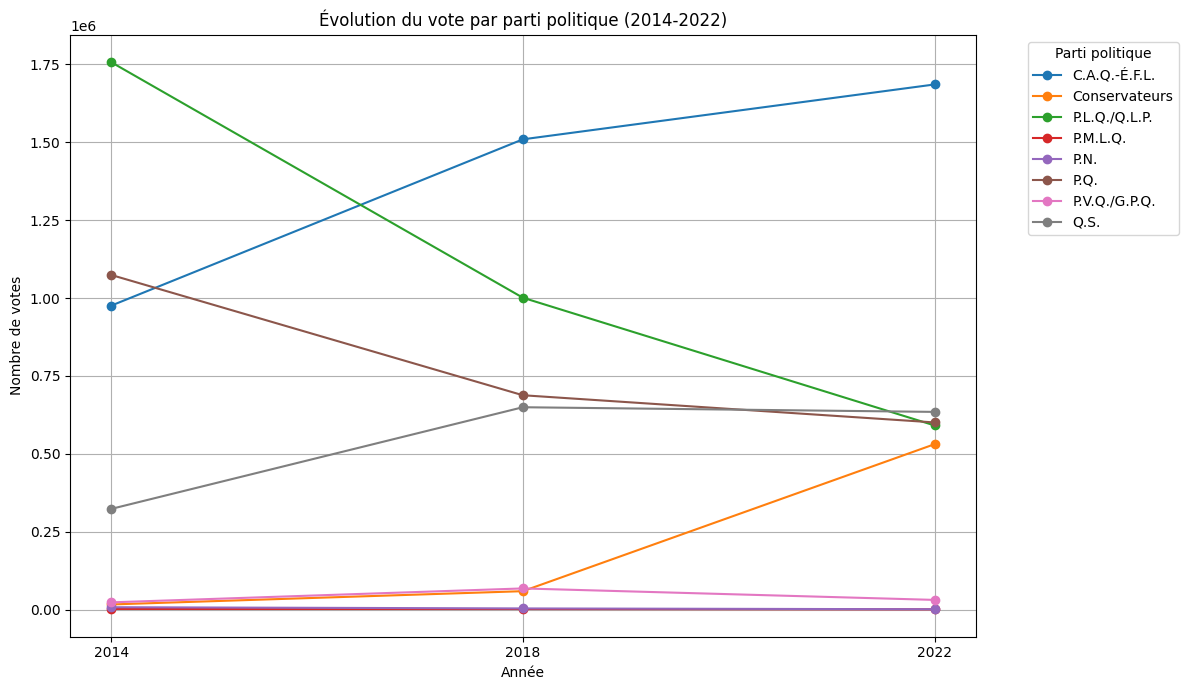

In [18]:
# Définir les années
annees = [2014, 2018, 2022]

# Tracer le graphique
plt.figure(figsize=(12, 7))
for index, row in df_votes.iterrows():
    parti = row['Parti politique']
    votes = [row['total_votes_2014'], row['total_votes_2018'], row['total_votes_2022']]
    plt.plot(annees, votes, marker='o', label=parti)

plt.title("Évolution du vote par parti politique (2014-2022)")
plt.xlabel("Année")
plt.ylabel("Nombre de votes")
plt.legend(title="Parti politique", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(annees)
plt.tight_layout()
plt.show()